<a href="https://colab.research.google.com/github/benslimanh/Green-Finance/blob/main/Green_Finance_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-3360753321.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, period='5y')['Close']
[*********************100%***********************]  2 of 2 completed


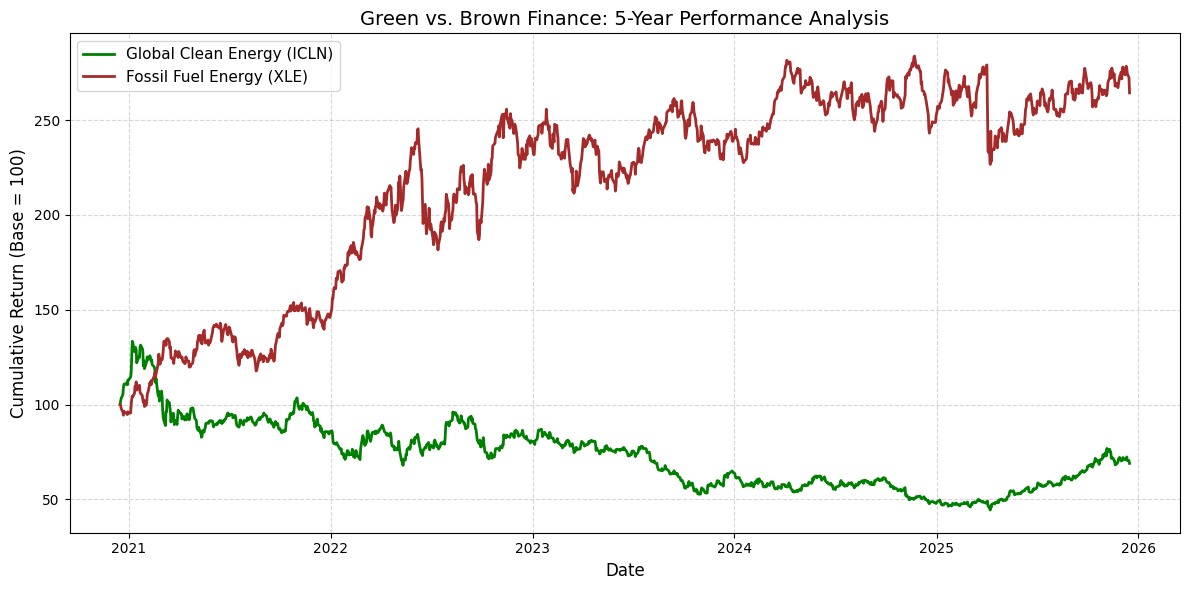


--- Correlation Matrix Report ---
Ticker      ICLN       XLE
Ticker                    
ICLN    1.000000  0.259362
XLE     0.259362  1.000000


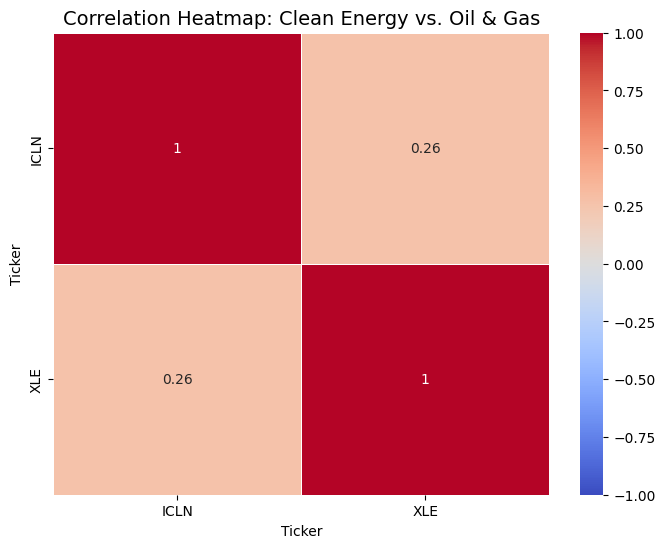

In [1]:
# 1. Install necessary libraries
!pip install yfinance seaborn

# 2. Import libraries
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 3. Define ETF Tickers
# ICLN: iShares Global Clean Energy ETF (Represents "Green" Energy)
# XLE: Energy Select Sector SPDR Fund (Represents "Brown" / Fossil Fuel Energy)
tickers = ['ICLN', 'XLE']

# 4. Download historical data (Last 5 years to cover different market cycles)
print("Downloading Market Data: Renewables vs. Fossil Fuels...")
data = yf.download(tickers, period='5y')['Close']

# 5. Normalize data (Rebase to 100)
# This allows us to compare the relative growth of two assets with different prices.
normalized_data = (data / data.iloc[0]) * 100

# 6. Visualization: Performance Comparison
plt.figure(figsize=(12, 6))

# Plotting the lines
plt.plot(normalized_data['ICLN'], label='Global Clean Energy (ICLN)', color='green', linewidth=2)
plt.plot(normalized_data['XLE'], label='Fossil Fuel Energy (XLE)', color='brown', linewidth=2)

# Formatting the chart
plt.title('Green vs. Brown Finance: 5-Year Performance Analysis', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (Base = 100)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

# --- Part 2: Statistical Analysis (Correlation) ---

# Calculate Daily Returns (Percentage change from the previous day)
daily_returns = data.pct_change().dropna()

# Calculate Correlation Matrix
# This measures how closely the two assets move together (-1 to +1)
correlation = daily_returns.corr()

print("\n--- Correlation Matrix Report ---")
print(correlation)

# Visualization: Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap: Clean Energy vs. Oil & Gas', fontsize=14)
plt.show()